In [1]:
import pandas as pd
import random
import os
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
# import pickle5 as pickle

from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier


In [2]:
price = pd.read_csv('../price_universe.csv', index_col=0)
price.index = pd.to_datetime(price.index)

In [3]:
price

,S&P 500,A,AAPL,ABC,ABT,ACGL,ADBE,ADI,ADM,ADP,...,SB,CC,KC,CT,LC,LH.1,FC,USDKRW,IEF,TLT
2018-01-02,2323.76,65.095131,40.950489,86.671799,53.904892,29.433332,177.699997,82.003815,34.854122,104.637054,...,18.76,2161.0,190.08,63.77,193.820,121.182,240.288,1061.20,96.978477,113.163429
2018-01-03,2339.29,66.751396,40.943363,86.994362,54.024086,29.459999,181.039993,83.021141,34.584610,105.773712,...,18.78,2130.0,188.00,64.18,194.250,122.113,240.206,1064.55,97.079865,113.704529
2018-01-04,2350.30,66.250656,41.133541,86.800812,53.932396,29.570000,183.220001,82.930305,35.167095,106.784096,...,18.72,2130.0,189.36,65.05,193.391,123.206,238.120,1062.15,97.033798,113.686455
2018-01-05,2366.48,67.309898,41.601864,87.851501,54.088268,29.453333,185.339996,83.266373,34.932358,106.720947,...,18.55,2119.0,187.71,64.17,188.744,123.165,232.272,1062.75,96.914001,113.361839
2018-01-08,2370.14,67.454338,41.447346,89.307693,53.932396,29.456667,185.039993,83.411736,34.854122,106.396202,...,18.25,2139.0,183.05,64.35,186.323,124.339,232.190,1066.10,96.867905,113.289734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,4801.71,156.562347,175.262802,127.924423,136.246506,43.480000,569.619995,169.451706,64.221039,237.479584,...,19.04,2591.0,219.98,86.08,156.671,70.424,193.477,1187.75,113.202599,145.104370
2021-12-27,4869.42,157.494995,179.289459,130.265030,138.498352,43.930000,577.679993,172.209473,64.839310,241.689438,...,19.06,2578.0,216.17,88.32,156.278,71.298,192.916,1186.80,113.241852,145.456100
2021-12-28,4865.61,157.931503,178.255417,130.719345,137.529083,44.270000,569.359985,171.139740,65.683281,241.473572,...,18.83,2603.0,214.79,86.88,156.418,71.156,195.220,1188.10,113.222221,144.879654
2021-12-29,4871.72,159.389984,178.344925,131.687180,138.233994,44.599998,569.289978,172.258560,65.761803,243.377304,...,18.98,2633.0,217.93,88.75,157.905,71.887,198.557,1186.40,112.643059,143.296921


In [5]:
snp = price,iloc[:, ]
snp

2018-01-02    2323.76
2018-01-03    2339.29
2018-01-04    2350.30
2018-01-05    2366.48
2018-01-08    2370.14
               ...   
2021-12-23    4801.71
2021-12-27    4869.42
2021-12-28    4865.61
2021-12-29    4871.72
2021-12-30    4859.24
Name: S&P 500, Length: 956, dtype: float64

In [4]:
min_max_scaler = MinMaxScaler()
snp = min_max_scaler.fit_transform(snp.to_numpy().reshape(-1,1))

In [19]:
# snp = price.iloc[:, :1]
# train = snp[:-30]
# data_train = train.to_numpy()
# data_train

In [20]:
# test = snp[-30:]
# test
# data_test = test.to_numpy()
# data_test

In [21]:
# min_max_scaler = MinMaxScaler()
# data_train = min_max_scaler.fit_transform(train.to_numpy().reshape(-1,1))
# data_test = min_max_scaler.transform(test.to_numpy().reshape(-1,1))

In [75]:
import pandas as pd

# Get just the closing price for each day

price = pd.read_csv('../price_universe.csv', index_col=0)
price.index = pd.to_datetime(price.index)

stock_prices = price.iloc[:, 1:2]

# Convert the data to a PyTorch tensor
stock_tensor = torch.FloatTensor(stock_prices.values)

import torch
from torch import nn
import math

class TransformerModel(nn.Module):
    def __init__(self, input_size, output_size, num_layers, hidden_size, num_heads, dropout):
        super().__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.num_heads = num_heads
        self.dropout = dropout
        
        self.pos_encoder = PositionalEncoding(hidden_size, dropout)
        encoder_layer = nn.TransformerEncoderLayer(hidden_size, num_heads, hidden_size, dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        self.encoder = nn.Linear(input_size, hidden_size)
        self.decoder = nn.Linear(hidden_size, output_size)
        
    def forward(self, src):
        src = self.encoder(src)
        src = src.permute(1, 0, 2)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src)
        output = self.decoder(output[-1, :, :])
        return output
    
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

    
# Define the hyperparameters for the model
input_size = 1
output_size = 1
# d_model = 128
num_layers = 6
hidden_size = 256
num_heads = 8
dropout = 0.1
lr = 0.001
num_epochs = 500

# Split the data into training and testing sets
train_data = stock_tensor[:len(stock_tensor)-30]
test_data = stock_tensor[len(stock_tensor)-30:]

# Normalize the data
mean = train_data.mean()
std = train_data.std()
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

# Create the model and the loss function
model = TransformerModel(input_size, output_size, num_layers, hidden_size, num_heads, dropout)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Train the model
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(train_data[:-1].unsqueeze(1))
    loss = criterion(output, train_data[1:])
    loss.backward()
    optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    


Epoch [1/500], Loss: 2.0915
Epoch [2/500], Loss: 14.3327
Epoch [3/500], Loss: 1.4553
Epoch [4/500], Loss: 2.2616
Epoch [5/500], Loss: 2.2665
Epoch [6/500], Loss: 0.7702
Epoch [7/500], Loss: 0.4506
Epoch [8/500], Loss: 0.8677
Epoch [9/500], Loss: 0.9332
Epoch [10/500], Loss: 0.5283
Epoch [11/500], Loss: 0.1787
Epoch [12/500], Loss: 0.0714
Epoch [13/500], Loss: 0.1523
Epoch [14/500], Loss: 0.2818
Epoch [15/500], Loss: 0.3612
Epoch [16/500], Loss: 0.3450
Epoch [17/500], Loss: 0.2588
Epoch [18/500], Loss: 0.1708
Epoch [19/500], Loss: 0.1135
Epoch [20/500], Loss: 0.1069
Epoch [21/500], Loss: 0.1403
Epoch [22/500], Loss: 0.1808
Epoch [23/500], Loss: 0.1952
Epoch [24/500], Loss: 0.1822
Epoch [25/500], Loss: 0.1472
Epoch [26/500], Loss: 0.1119
Epoch [27/500], Loss: 0.0911
Epoch [28/500], Loss: 0.0846
Epoch [29/500], Loss: 0.0918
Epoch [30/500], Loss: 0.0961
Epoch [31/500], Loss: 0.0984
Epoch [32/500], Loss: 0.1033
Epoch [33/500], Loss: 0.0755
Epoch [34/500], Loss: 0.0755
Epoch [35/500], Loss: 

Epoch [278/500], Loss: 0.0113
Epoch [279/500], Loss: 0.0111
Epoch [280/500], Loss: 0.0110
Epoch [281/500], Loss: 0.0104
Epoch [282/500], Loss: 0.0109
Epoch [283/500], Loss: 0.0128
Epoch [284/500], Loss: 0.0115
Epoch [285/500], Loss: 0.0125
Epoch [286/500], Loss: 0.0108
Epoch [287/500], Loss: 0.0126
Epoch [288/500], Loss: 0.0109
Epoch [289/500], Loss: 0.0117
Epoch [290/500], Loss: 0.0111
Epoch [291/500], Loss: 0.0103
Epoch [292/500], Loss: 0.0117
Epoch [293/500], Loss: 0.0103
Epoch [294/500], Loss: 0.0120
Epoch [295/500], Loss: 0.0105
Epoch [296/500], Loss: 0.0120
Epoch [297/500], Loss: 0.0106
Epoch [298/500], Loss: 0.0102
Epoch [299/500], Loss: 0.0108
Epoch [300/500], Loss: 0.0105
Epoch [301/500], Loss: 0.0118
Epoch [302/500], Loss: 0.0103
Epoch [303/500], Loss: 0.0107
Epoch [304/500], Loss: 0.0103
Epoch [305/500], Loss: 0.0106
Epoch [306/500], Loss: 0.0100
Epoch [307/500], Loss: 0.0107
Epoch [308/500], Loss: 0.0103
Epoch [309/500], Loss: 0.0106
Epoch [310/500], Loss: 0.0103
Epoch [311

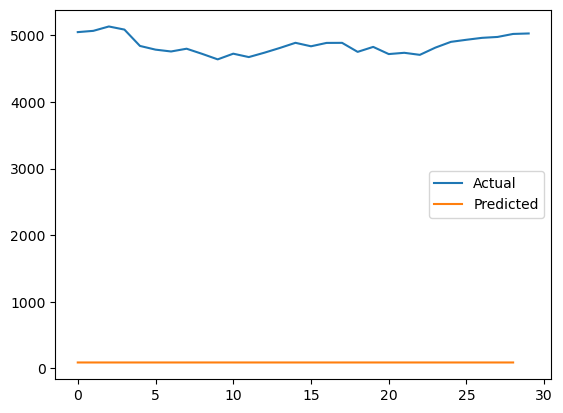

In [78]:
import matplotlib.pyplot as plt

# Evaluate the model on the test data
model.eval()
with torch.no_grad():
    preds = model(test_data[:-1].unsqueeze(1)).squeeze(1)

# Convert the normalized predictions back to the original scale
preds = (preds * std) + mean
test_data = (test_data * std) + mean

# Plot the actual vs predicted values
plt.plot(test_data, label='Actual')
plt.plot(preds, label='Predicted')
plt.legend()
plt.show()

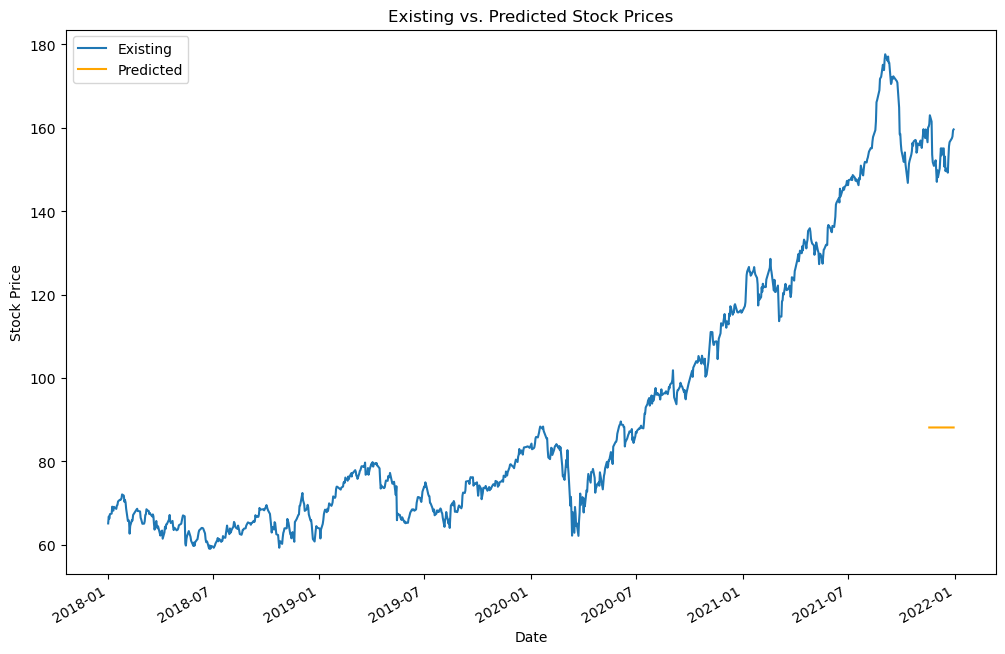

In [79]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    pred_data = model(test_data[:-1].unsqueeze(1))
    pred_data = pred_data * std + mean

# Convert the data back to a pandas DataFrame
pred_df = pd.DataFrame(pred_data.numpy(), index=price.index[-29:], columns=['Predicted'])

# Plot the existing and predicted data
ax = stock_prices.plot(figsize=(12, 8), legend=False)
ax.set_ylabel('Stock Price')
ax.set_title('Existing vs. Predicted Stock Prices')
ax.set_xlabel('Date')
ax.plot(pred_df.index, pred_df['Predicted'], color='orange')
plt.legend(['Existing', 'Predicted'])
plt.show()